## Data Cleaning

## What is Data Cleaning?

Data cleaning is the process of identifying and correcting (or removing) errors, inconsistencies, and inaccuracies in data to improve its quality and ensure it is ready for analysis.

### Steps in Data Cleaning - 

- Handling Missing Data
- Removing Duplicates
- Handling Outliers
- Data Normalization
- Data Transformation
- Encoding Categorycal Variables

-- It's not a fix steps to clean data , data cleaning is depend on the data set

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()*100/len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

## How many Customer on this Dataset ?

In [8]:
num_customers = len(df)
print(f"Number of customers: {num_customers}")

Number of customers: 7043


In [9]:
df.shape

(7043, 21)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

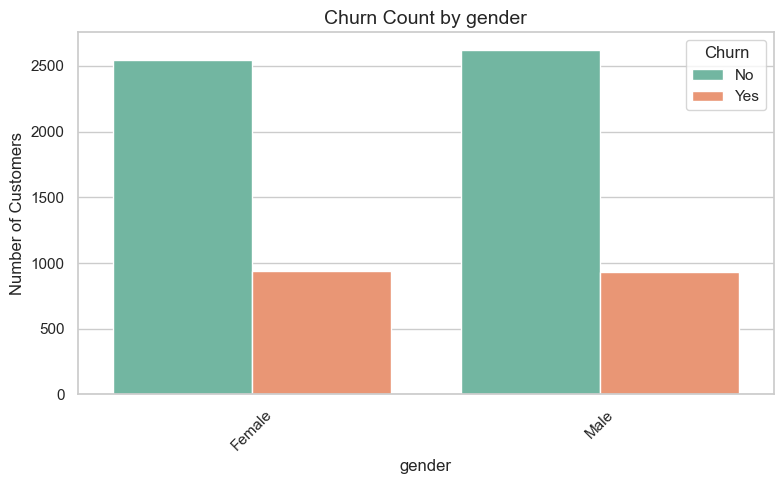

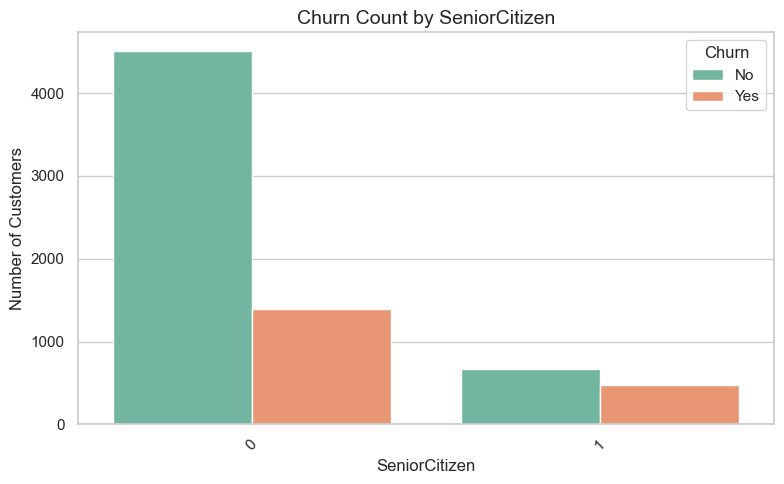

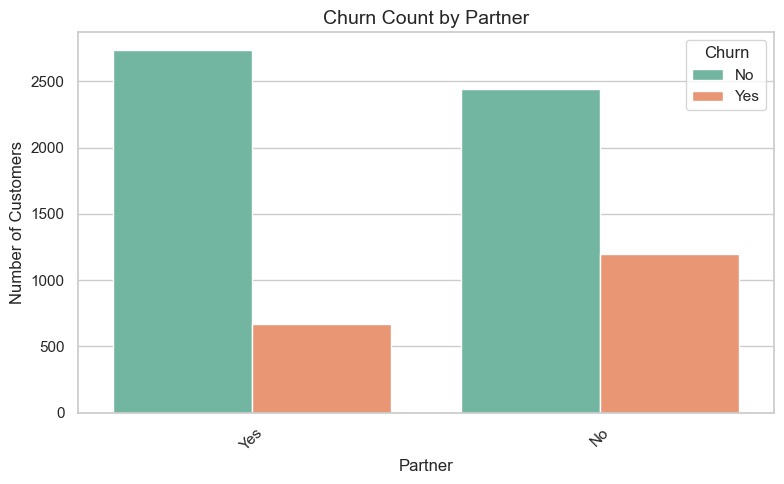

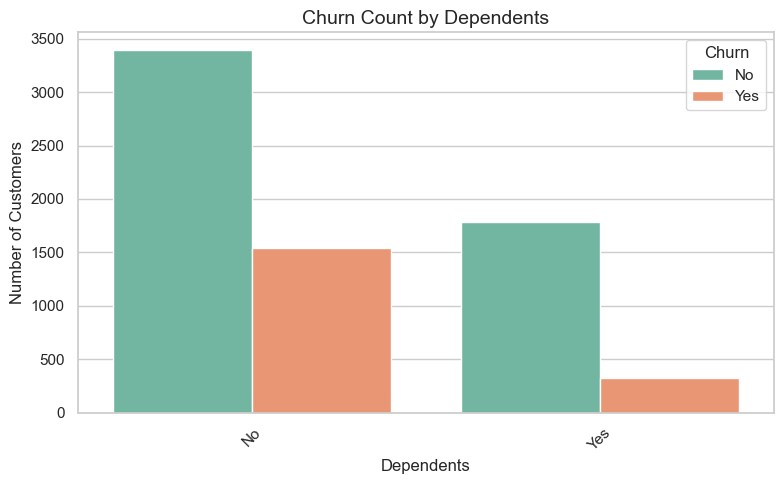

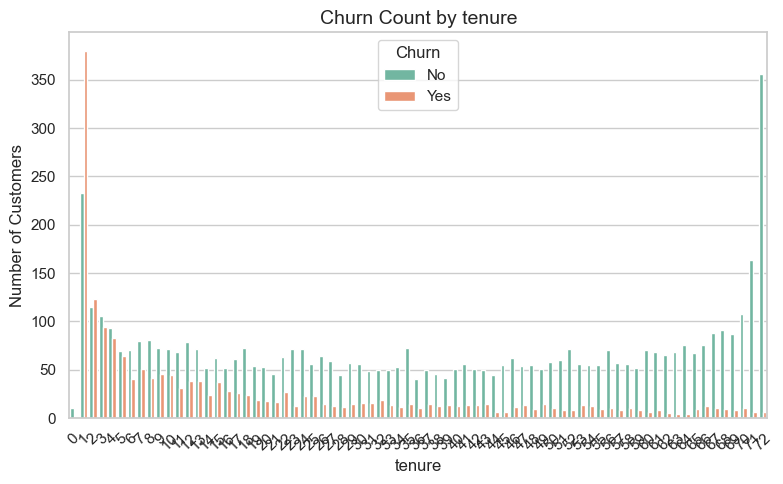

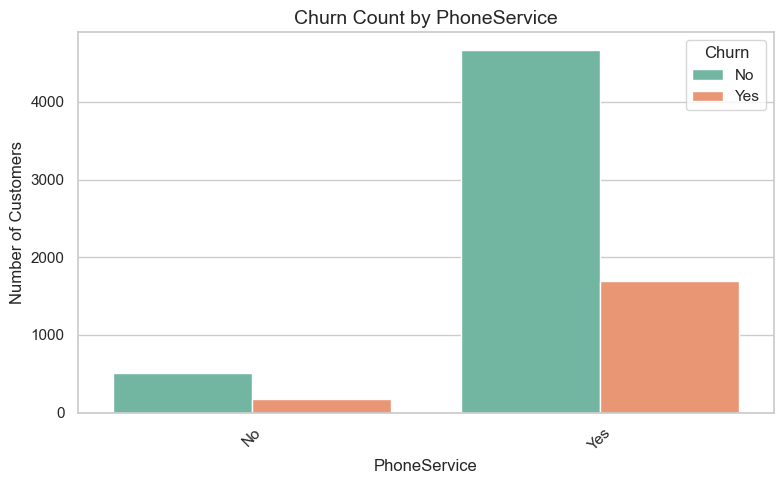

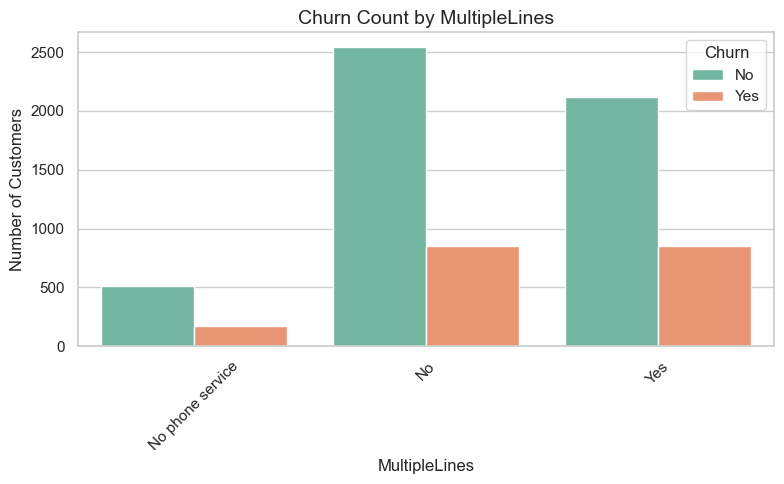

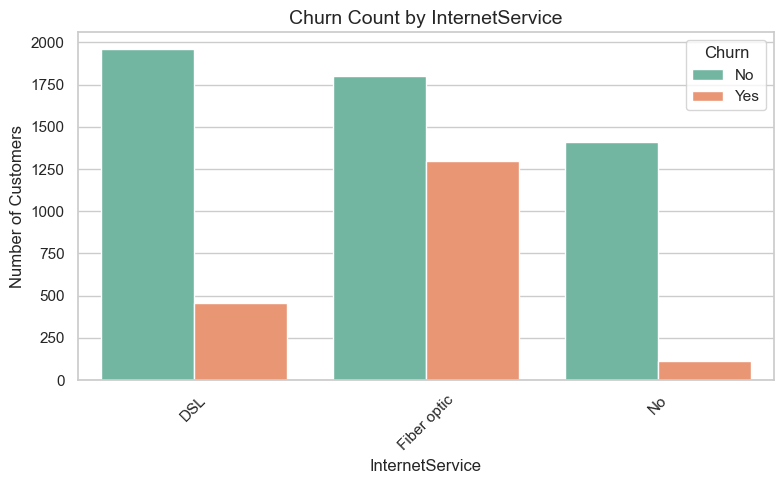

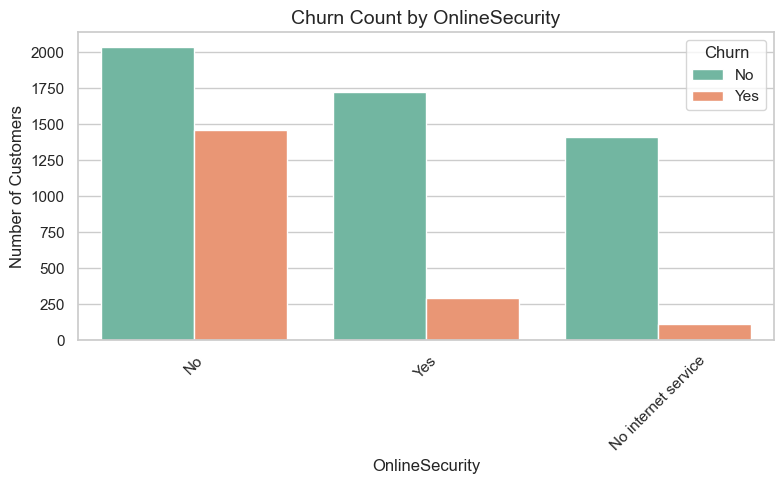

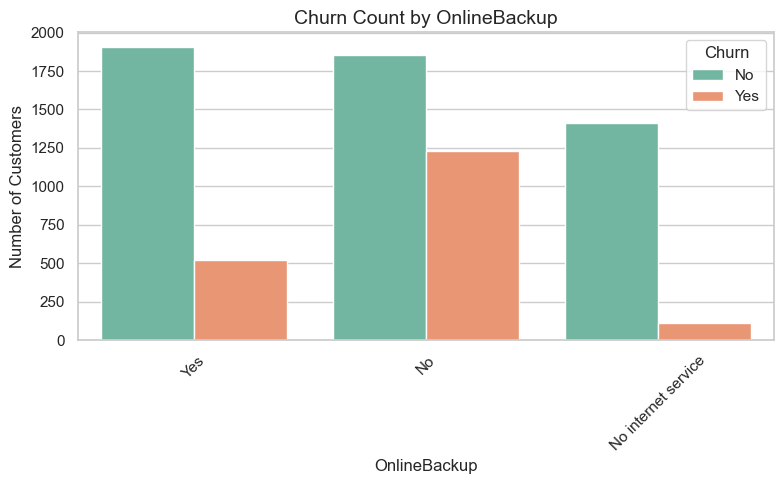

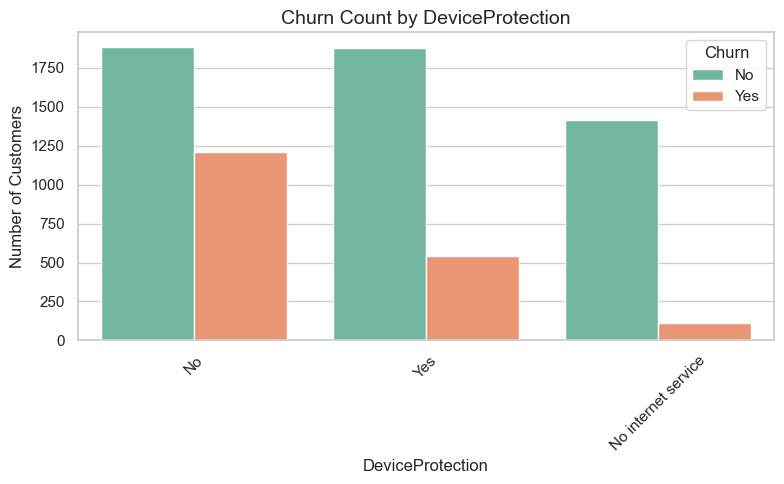

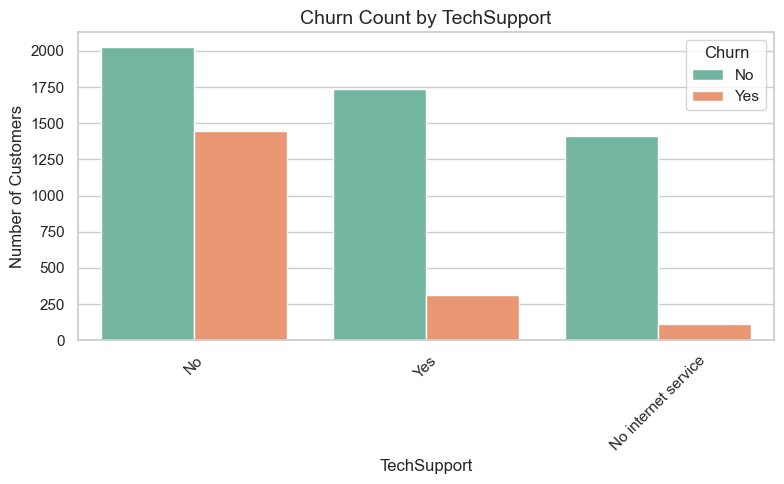

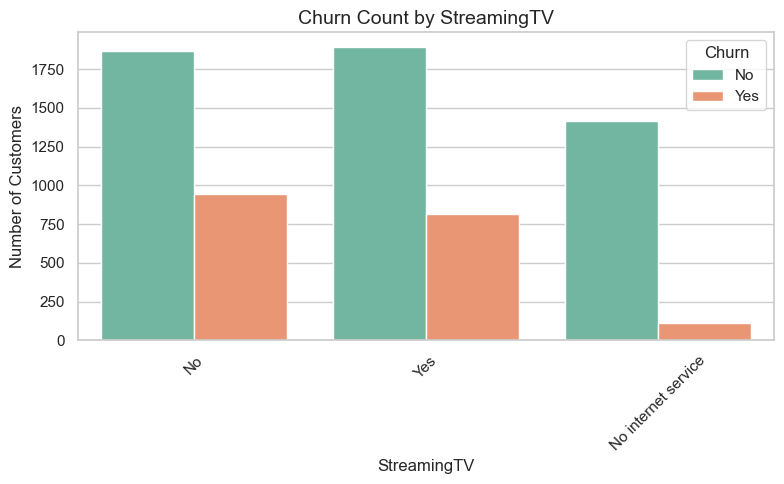

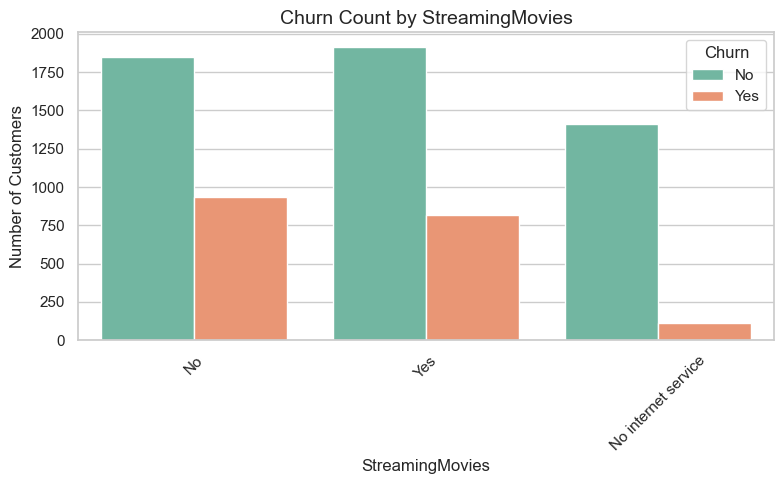

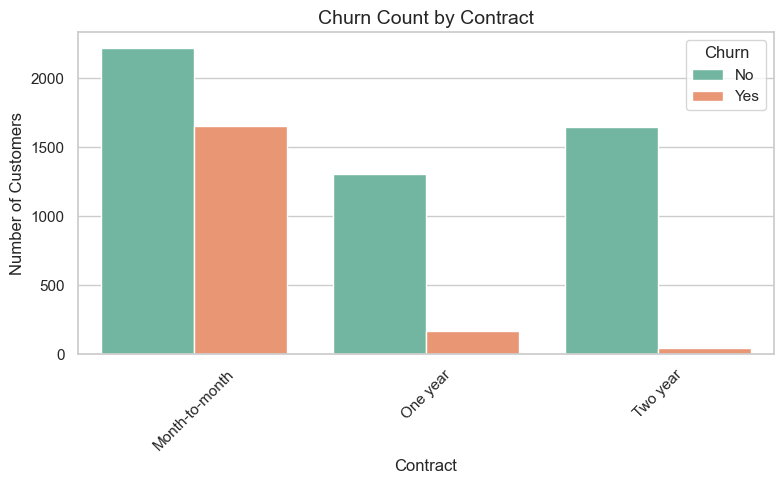

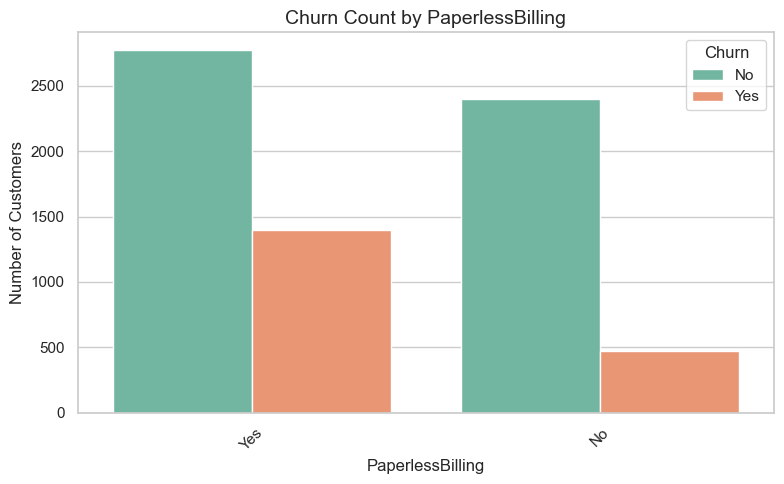

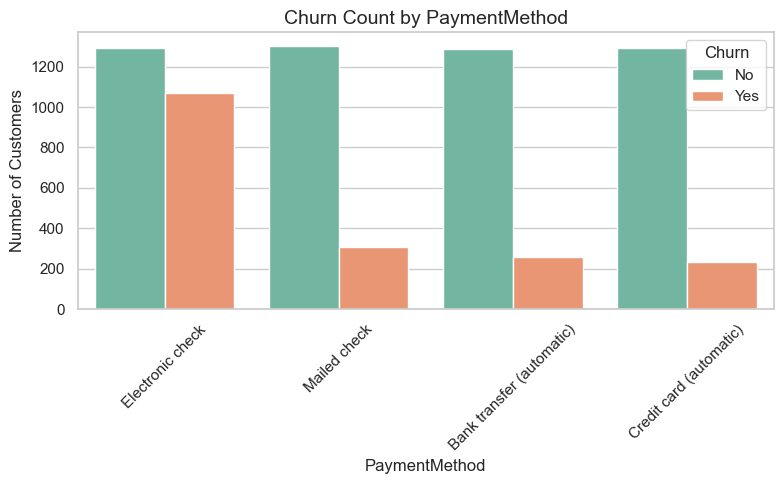

In [11]:


# Drop columns you don't want to use as predictors
excluded_columns = ['customerID', 'Churn', 'MonthlyCharges', 'TotalCharges']
predictors = df.drop(columns=excluded_columns).columns

# Plot setup
sns.set(style='whitegrid')

for predictor in predictors:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=predictor, hue='Churn', palette='Set2')
    
    # Add title and labels
    plt.title(f'Churn Count by {predictor}', fontsize=14)
    plt.xlabel(predictor, fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    
    # Rotate x labels if needed
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


## Churn Percentage Distribution by [Predictor]

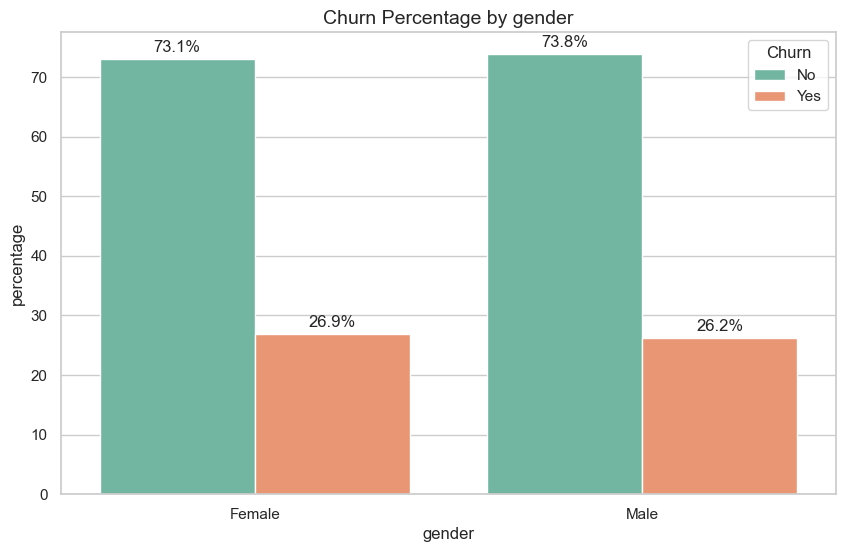

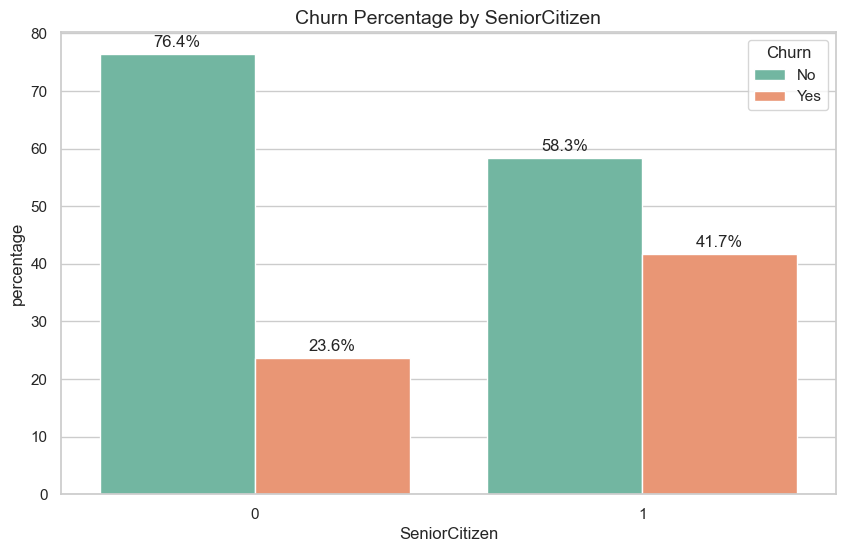

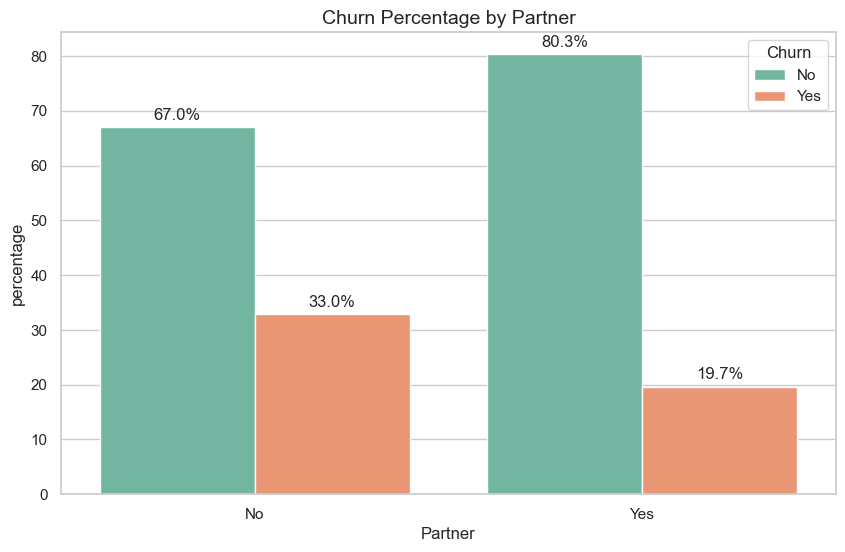

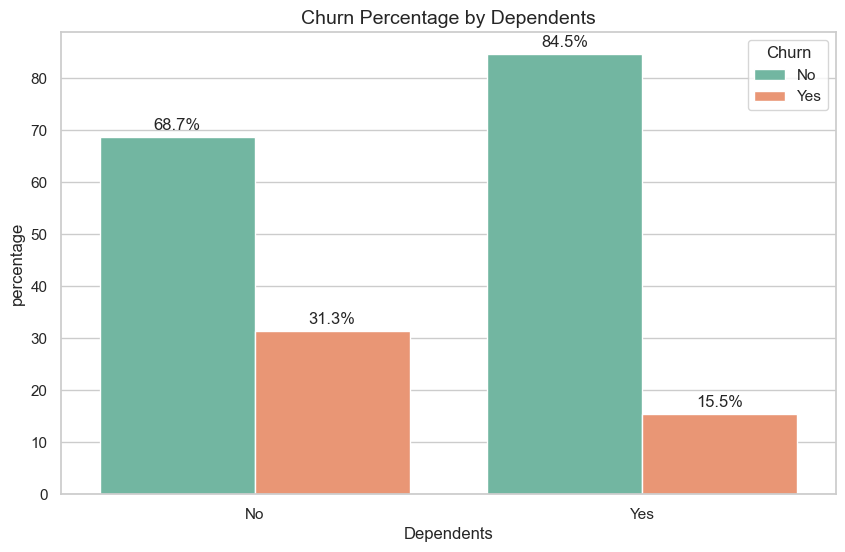

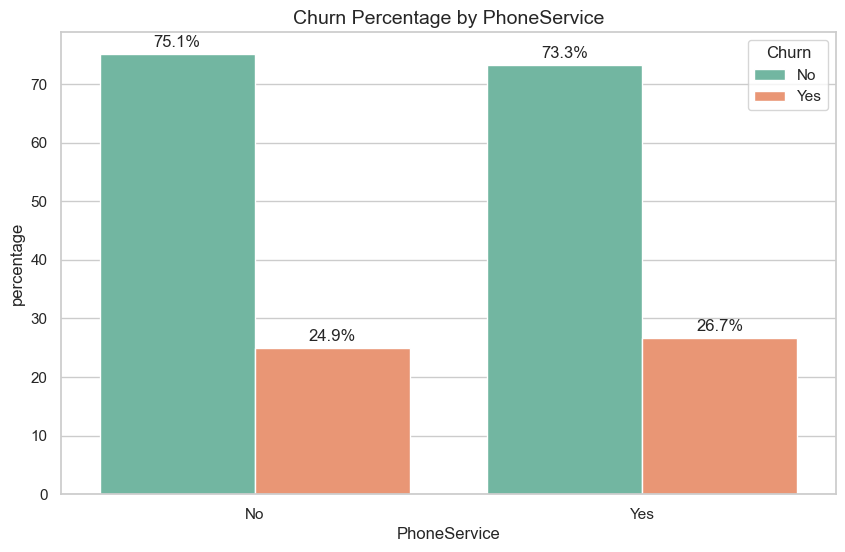

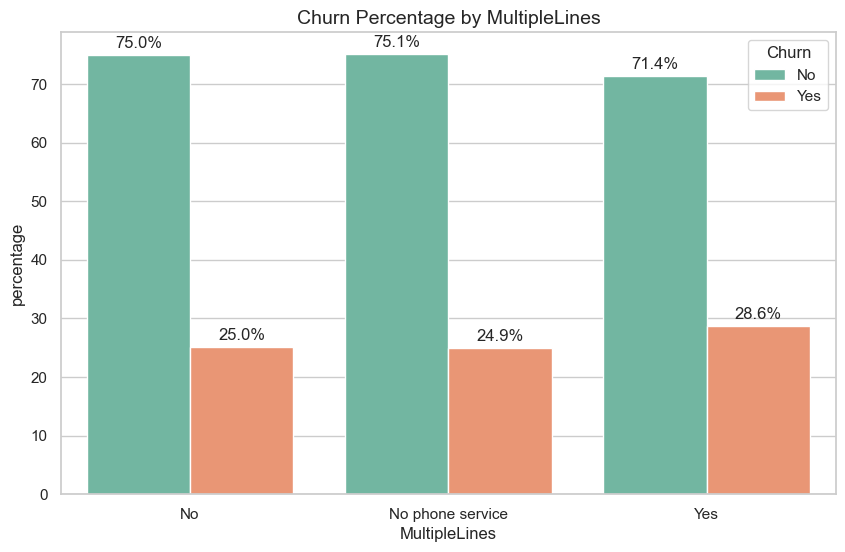

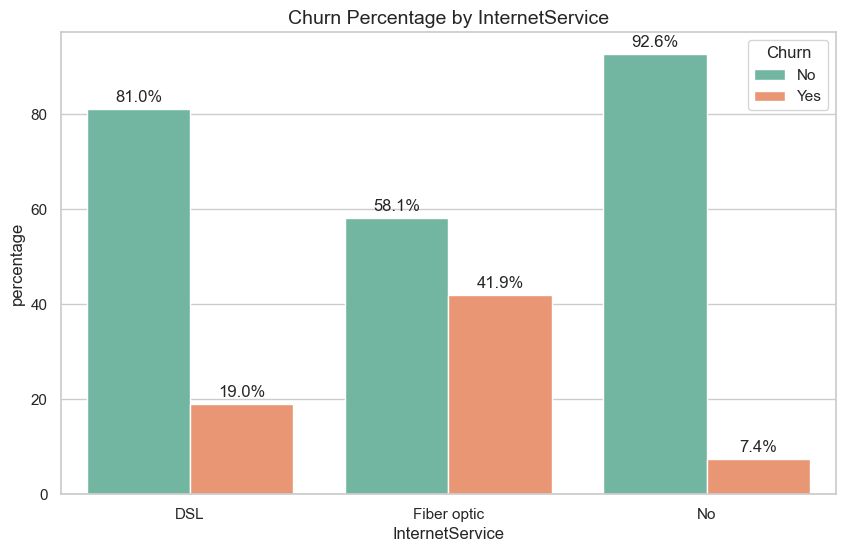

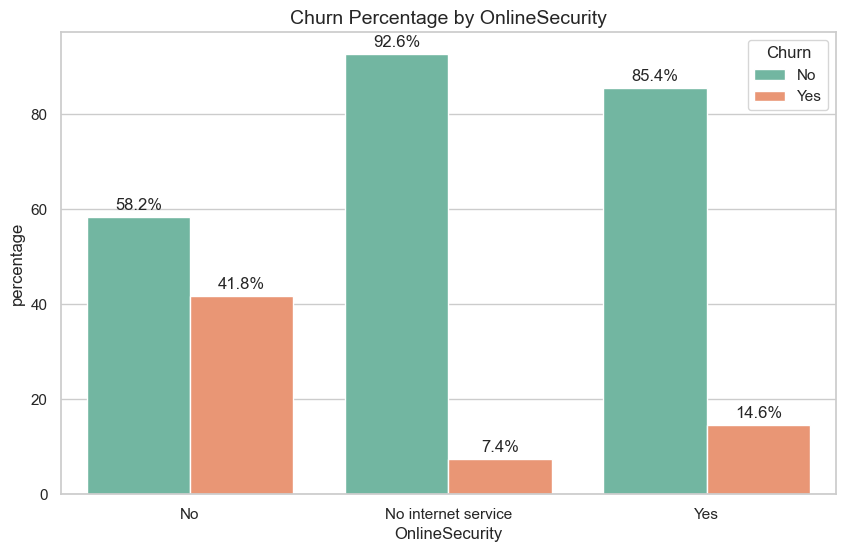

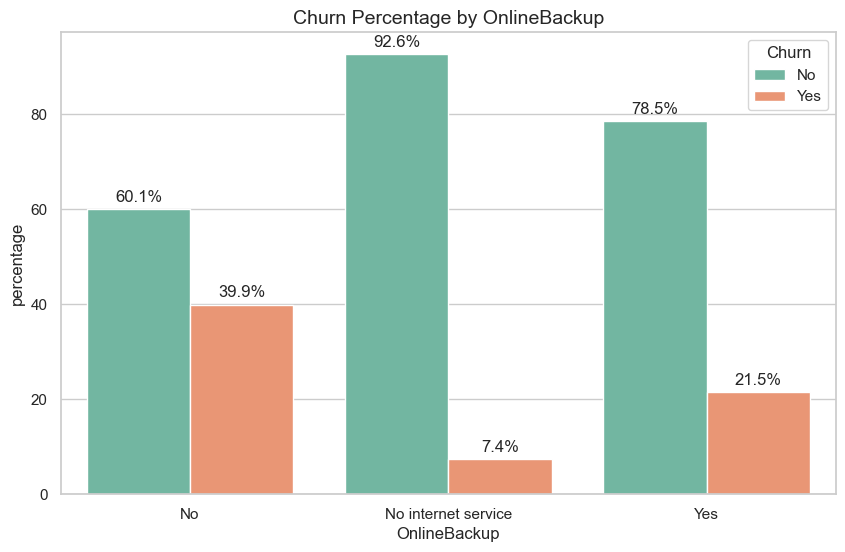

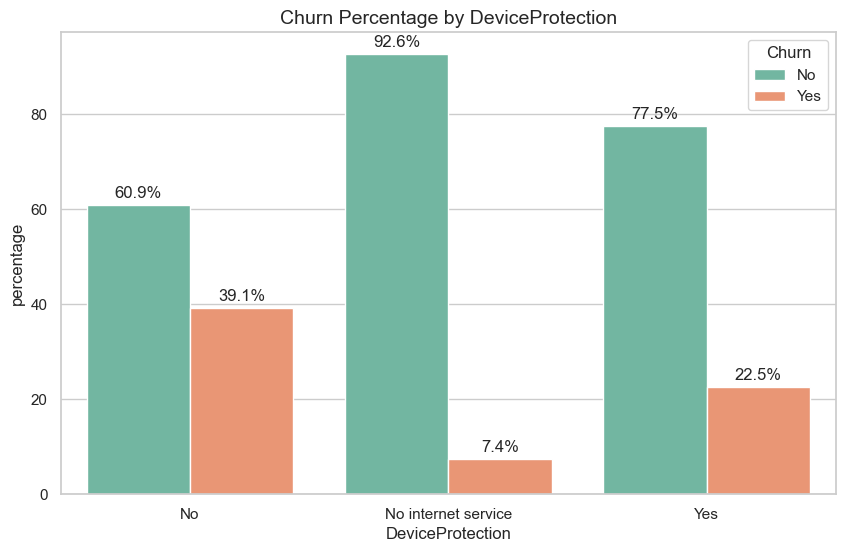

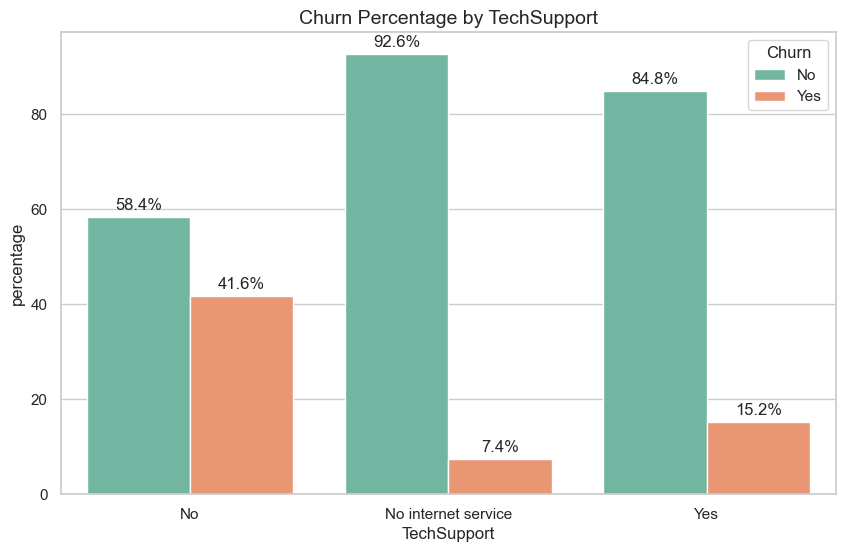

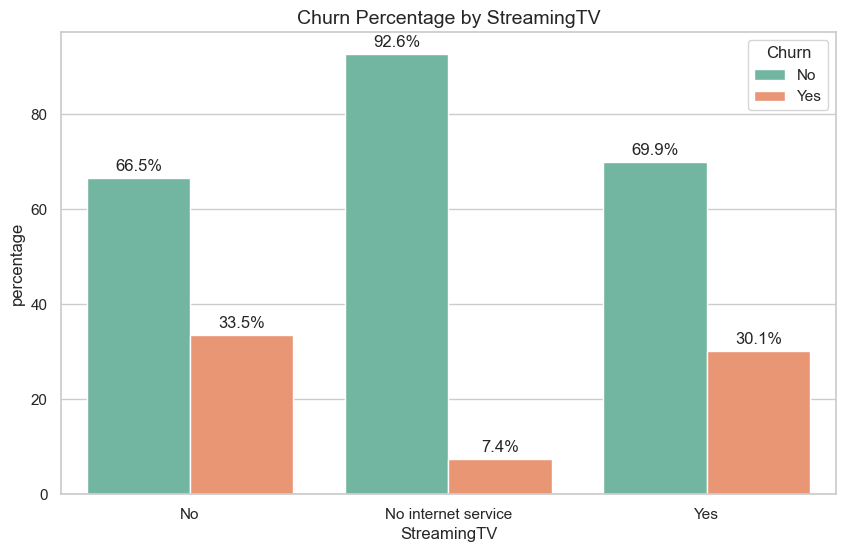

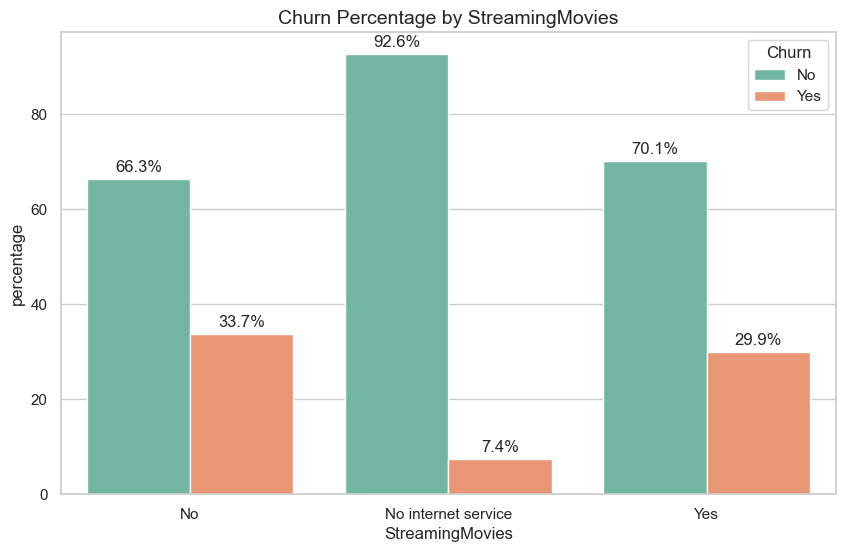

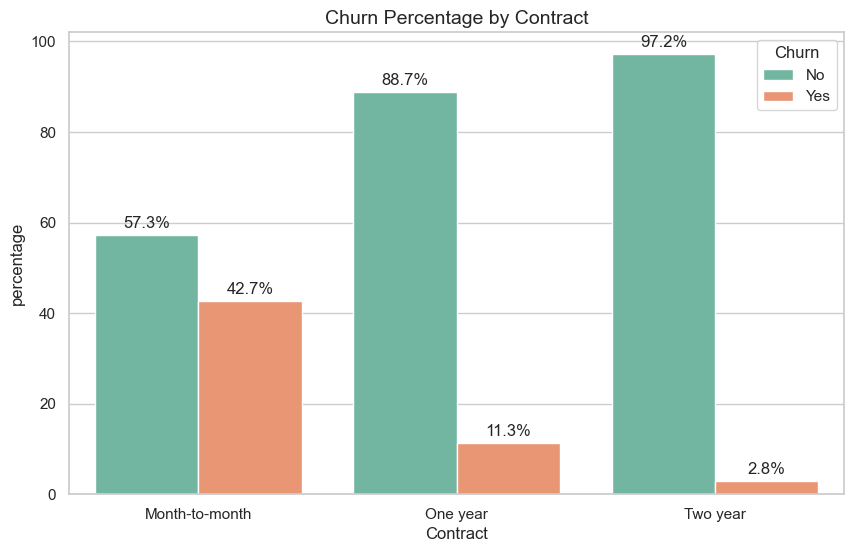

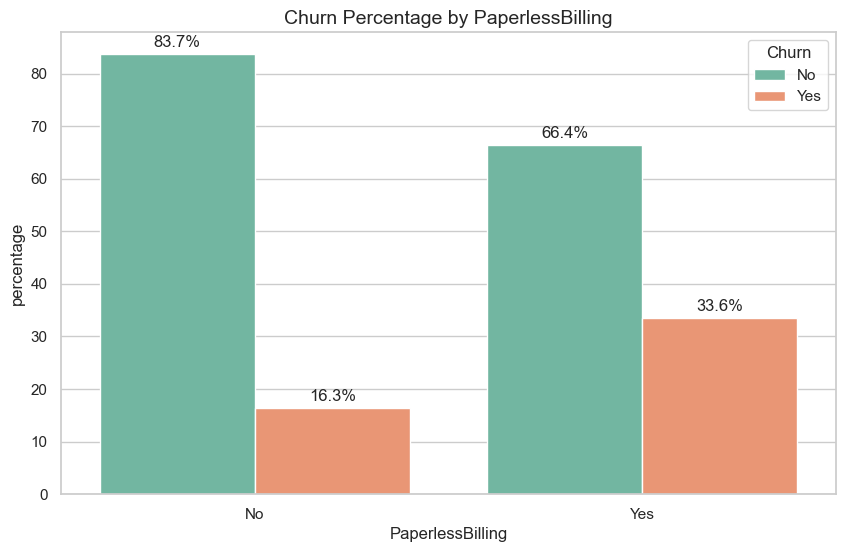

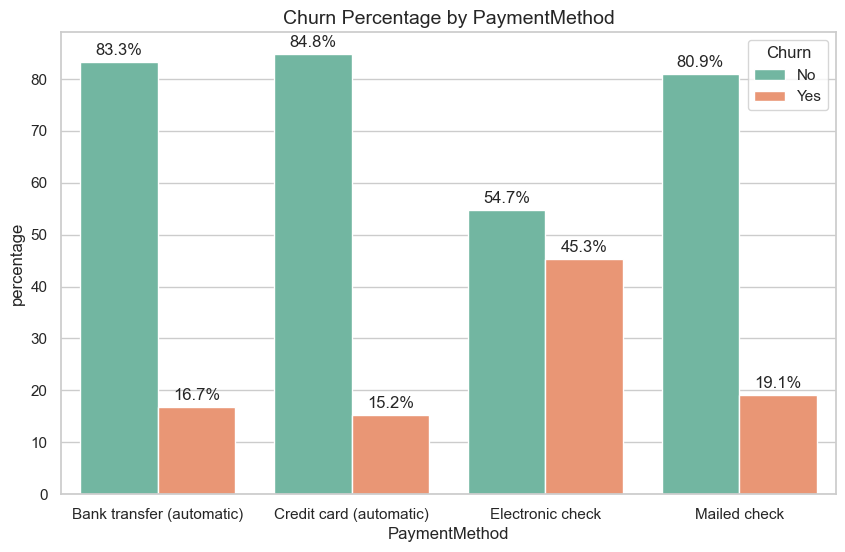

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop columns you don't want to use as predictors
excluded_columns = ['customerID', 'Churn', 'MonthlyCharges', 'TotalCharges','tenure']
predictors = df.drop(columns=excluded_columns).columns

# Ensure Churn is string/categorical for consistent behavior
df['Churn'] = df['Churn'].astype(str)

# Set Seaborn style
sns.set(style='whitegrid')

for predictor in predictors:
    plt.figure(figsize=(10, 6))

    # Calculate normalized counts (percentages)
    data_pct = df.groupby(predictor)['Churn'].value_counts(normalize=True).rename('percentage').reset_index()
    data_pct['percentage'] = data_pct['percentage'] * 100  # convert to percentage

    # Plot
    ax = sns.barplot(
        data=data_pct, 
        x=predictor, y='percentage', hue='Churn', 
        palette='Set2'
    )

    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

    # Title and formatting
    plt.title(f'Churn Percentage by {predictor}', fontsize=14)


In [13]:
df.isnull().sum().sum()

0

In [14]:
df.shape[1]

21

In [15]:
df.notnull().sum()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

### To showing Missing Values in a Graphical Representation Use - [sns.heatmap()]

<Axes: >

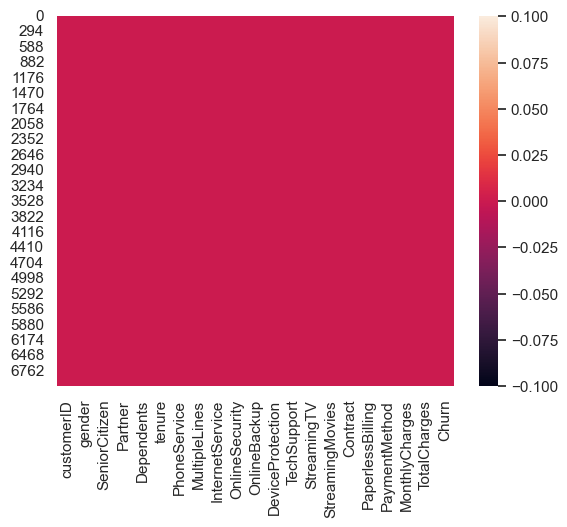

In [16]:
sns.heatmap(df.isnull())

- No null value is here on this dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.select_dtypes(include=['float64', 'int64'])

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [19]:
for i in df.select_dtypes(include=['float64', 'int64']).columns:
    print(i)
    df[i] = df[i].fillna(df[i].mean())

SeniorCitizen
tenure
MonthlyCharges


In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
mean = df['MonthlyCharges'].mean()
std = df['MonthlyCharges'].std()

In [22]:
min_val  = mean - 3*std
max_val = mean + 3*std

In [23]:
min_val,max_val

(-25.5084488324363, 155.03183375363466)

<Axes: xlabel='MonthlyCharges'>

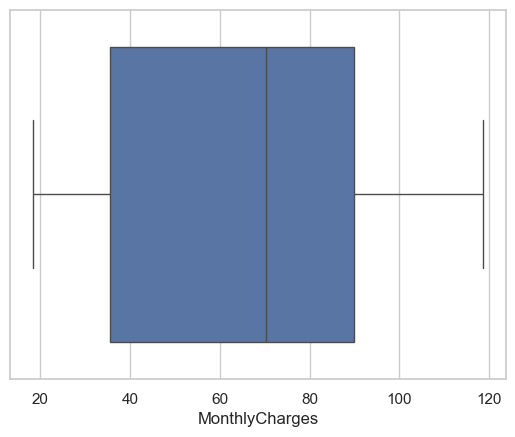

In [24]:
sns.boxplot(x=df['MonthlyCharges'])

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
df['gender'].mode()[0]

'Male'

In [27]:
df['gender'].mode()

0    Male
Name: gender, dtype: object

In [28]:
df['gender'].isnull().sum()

0

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
new_data  = df[['gender','Partner']]

In [31]:
new_data.head()

,gender,Partner
0,Female,Yes
1,Male,No
2,Male,No
3,Male,No
4,Female,No


In [32]:
pd.get_dummies(new_data)

,gender_Female,gender_Male,Partner_No,Partner_Yes
0,True,False,False,True
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,True,False,True,False
...,...,...,...,...
7038,False,True,False,True
7039,True,False,False,True
7040,True,False,False,True
7041,False,True,False,True


In [33]:
from sklearn.preprocessing import OneHotEncoder


In [41]:

from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first')

# Fit and transform the data
encoded_data = ohe.fit_transform(new_data)

# Convert the result to an array
encoded_array = encoded_data.toarray()

In [42]:
encoded_array

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 1.],
       [1., 0.]])

In [43]:
ali = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(new_data.columns))
ali

,gender_Male,Partner_Yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
7038,1.0,1.0
7039,0.0,1.0
7040,0.0,1.0
7041,1.0,1.0


In [39]:
new_data.columns

Index(['gender', 'Partner'], dtype='object')

## Label Encoding -

Nominal data is a type of categorical data that represents categories or labels without any inherent order or ranking among them. It is used to classify data into distinct groups or categories based on qualitative attributes. Examples of nominal data include:

- Gender (e.g., Male, Female)
- Colors (e.g., Red, Blue, Green)
- Payment Methods (e.g., Credit Card, Cash, Bank Transfer)
- Marital Status (e.g., Single, Married, Divorced)

In nominal data, the categories are mutually exclusive, and there is no logical order or hierarchy between them.

### What is Categorical Data?

Categorical data refers to variables that contain label values rather than numeric values. These labels represent categories or groups and are typically divided into two types:

1. **Nominal Data**: Categories without any inherent order or ranking (e.g., Gender, Colors, Payment Methods).
2. **Ordinal Data**: Categories with a meaningful order or ranking (e.g., Education Level, Customer Satisfaction Ratings).

Categorical data is often encoded into numerical values for analysis or machine learning purposes.

In [45]:
import pandas as pd

# Create a random DataFrame with wild animals
wild_animals_df = pd.DataFrame({
    'Animal': ['Tiger', 'Elephant', 'Lion', 'Giraffe', 'Zebra', 'Panda', 'Kangaroo', 'Leopard', 'Wolf', 'Bear'],
    'Habitat': ['Forest', 'Savannah', 'Savannah', 'Savannah', 'Grassland', 'Forest', 'Grassland', 'Forest', 'Forest', 'Forest'],
    'Weight_kg': [220, 5400, 190, 800, 350, 100, 85, 90, 50, 300],
    'Lifespan_years': [15, 70, 14, 25, 25, 20, 23, 12, 8, 20]
})

wild_animals_df

,Animal,Habitat,Weight_kg,Lifespan_years
0,Tiger,Forest,220,15
1,Elephant,Savannah,5400,70
2,Lion,Savannah,190,14
3,Giraffe,Savannah,800,25
4,Zebra,Grassland,350,25
5,Panda,Forest,100,20
6,Kangaroo,Grassland,85,23
7,Leopard,Forest,90,12
8,Wolf,Forest,50,8
9,Bear,Forest,300,20


In [46]:
cut_df = wild_animals_df['Animal']

In [47]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
wild_animals_df['en_name'] = le.fit_transform(cut_df)


In [55]:
wild_animals_df['en_name'] = wild_animals_df['en_name'].astype(float)

In [54]:
wild_animals_df.head()

,Animal,Habitat,Weight_kg,Lifespan_years,en_name
0,Tiger,Forest,220,15,7
1,Elephant,Savannah,5400,70,1
2,Lion,Savannah,190,14,5
3,Giraffe,Savannah,800,25,2
4,Zebra,Grassland,350,25,9


In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [60]:
la = LabelEncoder()
df['MultipleLines_en'] = la.fit_transform(df['MultipleLines'])

In [61]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_en
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


Label Encoding and One-Hot Encoding are used to convert categorical data into numerical data for machine learning models. Here's when to use each:

### **Label Encoding**
- **Use Case**: When the categorical variable has an **inherent order or ranking** (ordinal data).
- **Example**: 
    - Education Level: `['High School', 'Bachelor's', 'Master's', 'PhD']`
    - Customer Satisfaction: `['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']`
- **How It Works**: Assigns a unique integer to each category (e.g., `High School = 0`, `Bachelor's = 1`, etc.).

### **One-Hot Encoding**
- **Use Case**: When the categorical variable has **no inherent order or ranking** (nominal data).
- **Example**: 
    - Gender: `['Male', 'Female']`
    - Payment Methods: `['Credit Card', 'Cash', 'Bank Transfer']`
- **How It Works**: Creates a binary column for each category (e.g., `Male = [1, 0]`, `Female = [0, 1]`).

### **Key Differences**
- **Label Encoding**: Suitable for ordinal data; introduces a sense of order.
- **One-Hot Encoding**: Suitable for nominal data; avoids introducing false ordinal relationships.

### **When to Choose**
- If the categorical variable has **ordinal nature**, use **Label Encoding**.
- If the categorical variable is **nominal**, use **One-Hot Encoding**.

In [62]:
df['MultipleLines_en'].unique()

array([1, 0, 2])

## Ordinal Encoding

In [63]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [66]:
ord = OrdinalEncoder()
df['PaymentMethod_en'] = ord.fit_transform(df[['PaymentMethod']])

In [67]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_en,PaymentMethod_en
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,2.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,3.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,3.0


In [68]:
df['PaymentMethod_en'].unique()

array([2., 3., 0., 1.])

In [69]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [71]:
ord1 = OrdinalEncoder()
df['Contract_en'] = ord1.fit_transform(df[['Contract']])

In [72]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_en,PaymentMethod_en,Contract_en
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,2.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,0,3.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,3.0,0.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0.0,1.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,2.0,0.0


In [73]:
df['Contract_en'].unique()

array([0., 1., 2.])

In [74]:
df['Contract'].mode()[0]

'Month-to-month'

# Outlier Treatment

In [88]:
a = [2,4,6,8,5,7,15]


<Axes: >

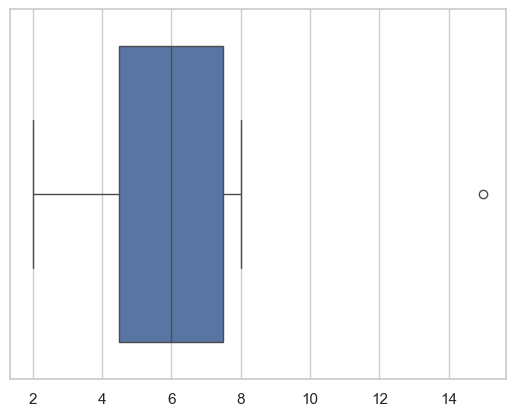

In [89]:
sns.boxplot(x=a)

In [90]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_en,PaymentMethod_en,Contract_en
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,2.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,0,3.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,3.0,0.0


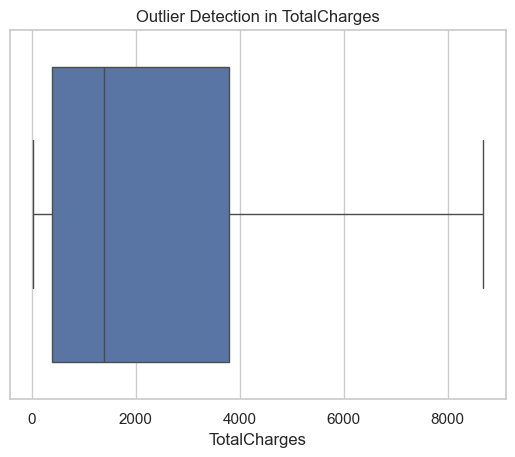

In [92]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for outliers using a boxplot
sns.boxplot(x=df['TotalCharges'])
plt.title('Outlier Detection in TotalCharges')
plt.show()

Outliers in 'a': [15]


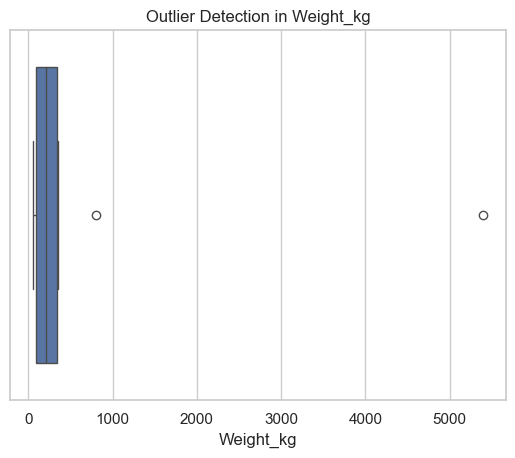

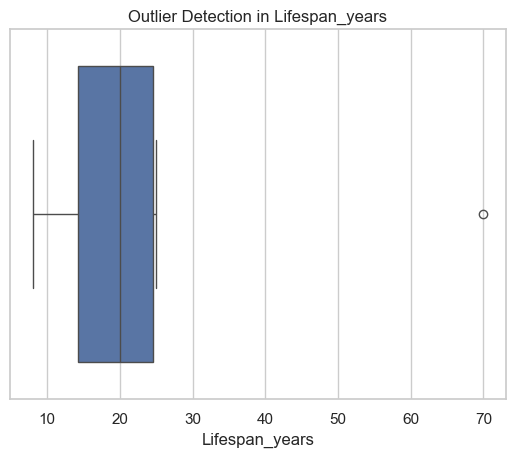

In [93]:
import numpy as np
import seaborn as sns

# Check for outliers in the list 'a' using IQR

q1 = np.percentile(a, 25)  # First quartile
q3 = np.percentile(a, 75)  # Third quartile
iqr = q3 - q1  # Interquartile range

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_a = [x for x in a if x < lower_bound or x > upper_bound]
print(f"Outliers in 'a': {outliers_a}")

# Check for outliers in numerical columns of 'wild_animals_df' using boxplots
import matplotlib.pyplot as plt

for column in ['Weight_kg', 'Lifespan_years']:
    sns.boxplot(x=wild_animals_df[column])
    plt.title(f'Outlier Detection in {column}')
    plt.show()

### Summary Statistics of the Dataset

In [94]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MultipleLines_en,PaymentMethod_en,Contract_en
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.940508,1.574329,0.690473
std,0.368612,24.559481,30.090047,2266.771362,0.948554,1.068104,0.833755
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,2.000000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,2.000000,2.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,2.000000,3.000000,2.000000


## Finding Outlier Using some Visual Method

<Axes: xlabel='TotalCharges'>

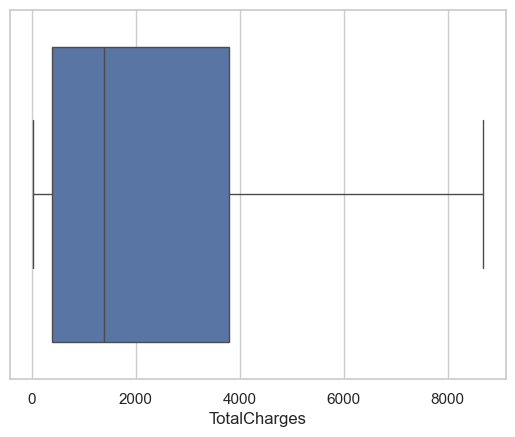

In [99]:
sns.boxplot(x=df['TotalCharges'])

C:\Users\moham\AppData\Local\Temp\ipykernel_16464\1483699013.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])


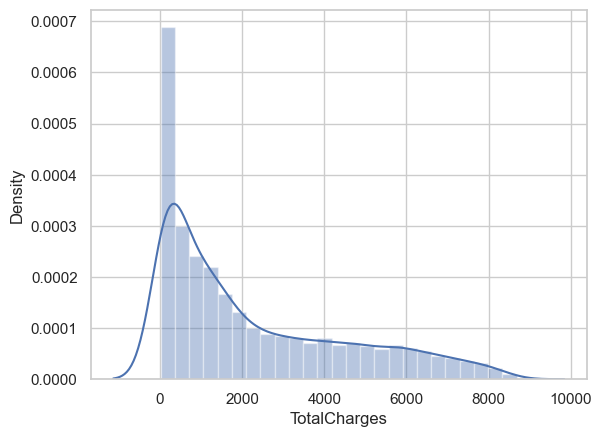

In [101]:
sns.distplot(df['TotalCharges'])
plt.show()

## 1. Outlier Removing Using IQR Method 

### What is IQR (Interquartile Range)?

The **Interquartile Range (IQR)** is a measure of statistical dispersion, which is the spread of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):

**IQR = Q3 - Q1**

- **Q1 (First Quartile)**: The value below which 25% of the data falls.
- **Q3 (Third Quartile)**: The value below which 75% of the data falls.

### Use Cases of IQR

1. **Outlier Detection**:
    - IQR is commonly used to detect outliers in a dataset.
    - Outliers are values that fall below **Q1 - 1.5 * IQR** or above **Q3 + 1.5 * IQR**.

2. **Data Cleaning**:
    - Helps in identifying and removing extreme values that may skew the analysis.

3. **Data Analysis**:
    - Provides insights into the spread and variability of the central portion of the data.

4. **Boxplot Visualization**:
    - IQR is used in boxplots to represent the spread of the data and identify potential outliers.

5. **Robustness**:
    - Unlike the range, IQR is not affected by extreme values, making it a robust measure of variability.

### Example of IQR Calculation

For the list `a = [2, 4, 6, 8, 5, 7, 15]`:
- Q1 = 4.5
- Q3 = 7.5
- IQR = Q3 - Q1 = 7.5 - 4.5 = 3.0

In [102]:
data = df.copy()

In [105]:
q1 = data['TotalCharges'].quantile(0.25)
q3 = data['TotalCharges'].quantile(0.75)
iqr = round(q3-q1,2)

In [106]:
iqr

3393.29

In [ ]:
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr

print(f"Lower Bound: {min}, Upper Bound: {max}")

Lower Bound: -4688.485, Upper Bound: 8884.6725


In [112]:
np.where((df['TotalCharges'] < min) | (df['TotalCharges'] > max))

(array([], dtype=int64),)

In [ ]:
# Filter the dataset to exclude outliers
filtered_df = df[(df['TotalCharges'] >= min) & (df['TotalCharges'] <= max)]
# Display the filtered dataset
filtered_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_en,PaymentMethod_en,Contract_en
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,2.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0,3.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,3.0,0.0


The `or` and `and` operators are logical operators in Python:

### **`or` Operator**
- **Use**: Returns `True` if **at least one** condition is `True`.
- **Example**:
    ```python
    if age < 18 or age > 60:
        print("Eligible for discount")
    ```

### **`and` Operator**
- **Use**: Returns `True` if **all** conditions are `True`.
- **Example**:
    ```python
    if age > 18 and age < 30:
        print("Eligible for program")
    ```

### **Key Differences**
| **Operator** | **Condition**       | **Result** |
|--------------|---------------------|------------|
| `or`         | `True or False`     | `True`     |
| `and`        | `True and False`    | `False`    |

- Use `or` when **any** condition suffices.
- Use `and` when **all** conditions must hold.


In [117]:
df_result = df[(df['TotalCharges'] > min) & (df['TotalCharges'] < max)]
df_result.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_en,PaymentMethod_en,Contract_en
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,2.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0,3.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,3.0,0.0


## Outlier Treatment Using Z-Score

The **z-score** formula is used to measure how many standard deviations a data point is from the mean of a dataset. The formula is:

\[
z = \frac{x - \mu}{\sigma}
\]

Where:
- \( z \): The z-score
- \( x \): The data point
- \( \mu \): The mean of the dataset
- \( \sigma \): The standard deviation of the dataset

In [118]:
mean = df['TotalCharges'].mean()
std = df['TotalCharges'].std()
min_val = mean - 3*std
max_val = mean + 3*std

In [119]:
min_val, max_val

(-4517.013644807569, 9083.6145264913)

In [120]:
z_score = (df['TotalCharges'] - mean)/std

In [121]:
z_score

0      -0.994123
1      -0.173727
2      -0.959581
3      -0.195234
4      -0.940391
          ...   
7038   -0.129171
7039    2.240896
7040   -0.854453
7041   -0.872033
7042    2.012201
Name: TotalCharges, Length: 7043, dtype: float64

In [122]:
df['z_score_TotalCharges'] = z_score

In [124]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_en,PaymentMethod_en,Contract_en,z_score_TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,2.0,0.0,-0.994123
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,0,3.0,1.0,-0.173727
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,3.0,0.0,-0.959581


In [125]:
df['z_score_TotalCharges'].unique()

array([-0.99412339, -0.17372746, -0.95958087, ..., -0.85445338,
       -0.87203345,  2.01220098])

In [127]:
df.loc[df['z_score_TotalCharges'] < 3]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_en,PaymentMethod_en,Contract_en,z_score_TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,2.0,0.0,-0.994123
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,0,3.0,1.0,-0.173727
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,3.0,0.0,-0.959581
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0.0,1.0,-0.195234
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,2.0,0.0,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,One year,Yes,Mailed check,84.80,1990.50,No,2,3.0,1.0,-0.129171
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,2,1.0,1.0,2.240896
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,2.0,0.0,-0.854453
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,2,3.0,0.0,-0.872033


In [128]:
df.shape

(7043, 25)

In [130]:
df[df['z_score_TotalCharges'] > 3].shape

(0, 25)

## Feature Scaling 

Feature scaling is a technique used to normalize or standardize the range of independent variables or features in a dataset. It ensures that all features contribute equally to the model's performance and prevents features with larger ranges from dominating those with smaller ranges.

### **Definition of Feature Scaling**
Feature scaling is the process of transforming the values of features into a specific range (e.g., 0 to 1) or distribution (e.g., standard normal distribution with mean 0 and standard deviation 1). This is done to improve the performance and convergence of machine learning algorithms.

### **Why is Feature Scaling Important?**
1. **Improves Model Performance**: Many machine learning algorithms (e.g., gradient descent, SVM, KNN) are sensitive to the scale of features.
2. **Speeds Up Convergence**: Scaling helps algorithms converge faster during optimization.
3. **Prevents Bias**: Ensures that features with larger ranges do not dominate the learning process.

### **Common Methods of Feature Scaling**
1. **Min-Max Scaling (Normalization)**:
    - Scales features to a fixed range, typically [0, 1].
    - Formula: 
      \[
      X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
      \]

2. **Standardization (Z-Score Scaling)**:
    - Transforms features to have a mean of 0 and a standard deviation of 1.
    - Formula:
      \[
      Z = \frac{X - \mu}{\sigma}
      \]
    - Where \( \mu \) is the mean and \( \sigma \) is the standard deviation.

3. **Robust Scaling**:
    - Uses the median and interquartile range (IQR) to scale features, making it robust to outliers.
    - Formula:
      \[
      X' = \frac{X - \text{median}}{\text{IQR}}
      \]

4. **MaxAbs Scaling**:
    - Scales features by dividing by the maximum absolute value of each feature.

### **When to Use Feature Scaling**
- Algorithms like SVM, KNN, PCA, and Gradient Descent require feature scaling.
- Algorithms like Decision Trees and Random Forests are not sensitive to feature scaling.

## 1 . Standardization

## 2. Normalization

Normalization is a feature scaling technique used to rescale the values of a dataset to a specific range, typically between 0 and 1. It ensures that all features contribute equally to the model's performance and prevents features with larger ranges from dominating those with smaller ranges.

### **Formula for Normalization**
The formula for Min-Max Normalization is:

\[
X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\]

Where:
- \( X \): Original value
- \( X_{\text{min}} \): Minimum value in the dataset
- \( X_{\text{max}} \): Maximum value in the dataset
- \( X' \): Normalized value

### **Key Points**
1. **Range**: Normalization scales the data to a fixed range, usually [0, 1].
2. **Use Case**: It is useful when the data does not follow a Gaussian distribution or when the algorithm is sensitive to the magnitude of the features (e.g., KNN, Neural Networks).
3. **Effect**: Normalization preserves the relationships between data points while scaling them.

### **Example**
If a dataset contains values [10, 20, 30, 40, 50], normalization will transform it to [0, 0.25, 0.5, 0.75, 1].

### **When to Use Normalization**
- When the data does not follow a normal distribution.
- When using machine learning algorithms that are sensitive to the scale of data, such as KNN, SVM, or Neural Networks.

### **Difference Between Normalization and Standardization**
- **Normalization**: Scales data to a fixed range (e.g., [0, 1]).
- **Standardization**: Transforms data to have a mean of 0 and a standard deviation of 1.

# Handling Duplicate Data

In [131]:
df.shape

(7043, 25)

In [133]:
nw = df.drop_duplicates(keep='first')

In [134]:
nw.shape

(7043, 25)

# Replace and Data Type Change

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   object 
 2   SeniorCitizen         7043 non-null   int64  
 3   Partner               7043 non-null   object 
 4   Dependents            7043 non-null   object 
 5   tenure                7043 non-null   int64  
 6   PhoneService          7043 non-null   object 
 7   MultipleLines         7043 non-null   object 
 8   InternetService       7043 non-null   object 
 9   OnlineSecurity        7043 non-null   object 
 10  OnlineBackup          7043 non-null   object 
 11  DeviceProtection      7043 non-null   object 
 12  TechSupport           7043 non-null   object 
 13  StreamingTV           7043 non-null   object 
 14  StreamingMovies       7043 non-null   object 
 15  Contract             

# Function Tranformation